<a href="https://colab.research.google.com/github/yutianma1802/master-thesis/blob/Strategies-to-improve-early-time-signal-stability/refinement_of_assay_using_hpnmt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
/content/10 flashes.xlsx

<>:1: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<>:1: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
/tmp/ipython-input-2926019160.py:1: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
  content/10(flashes.xlsx)


NameError: name 'content' is not defined

In [ ]:
# Define the mapping of conditions to column names
data_map = {
    "with enzyme_20uM": ["A1", "A2", "A3"],
    "with enzyme_50uM": ["B1", "B2", "B3"],
    "with enzyme_100uM": ["C1", "C2", "C3"],
    "with enzyme_300uM": ["D1", "D2", "D3"],
    "with enzyme_600uM": ["E1", "E2", "E3"],
    "without enzyme_20uM": ["A4", "A5", "A6"],
    "without enzyme_50uM": ["B4", "B5", "B6"],
    "without enzyme_100uM": ["C4", "C5", "C6"],
    "without enzyme_300uM": ["D4", "D5", "D6"],
    "without enzyme_600uM": ["E4", "E5", "E6"]
}

# Initialize a dictionary to store the extracted data
extracted_dataframes = {}

# Extract data based on the map
time_column = df['Time [s]']

for condition, columns in data_map.items():
    # Select the specified columns and combine with the time column
    try:
        extracted_df = df[columns].copy()
        extracted_df.insert(0, 'Time [s]', time_column)
        extracted_dataframes[condition] = extracted_df
    except KeyError as e:
        print(f"Warning: Column {e} not found in the DataFrame.")
        extracted_dataframes[condition] = None # Or some other indicator for missing data

# Display the extracted dataframes for each condition
for condition, data in extracted_dataframes.items():
    print(f"Data for condition: {condition}")
    if data is not None:
        display(data.head())
    else:
        print("No data extracted due to missing columns.")

Data for condition: with enzyme_20uM


,Time [s],A1,A2,A3
0,0.000,0.7701,0.7765,0.7626
1,60.008,0.7679,0.7764,0.7595
2,120.023,0.7659,0.7735,0.7572
3,180.038,0.7645,0.7715,0.7548
4,240.064,0.7628,0.7692,0.7525


Data for condition: with enzyme_50uM


,Time [s],B1,B2,B3
0,0.000,0.7606,0.7547,0.7637
1,60.008,0.7575,0.7524,0.7608
2,120.023,0.7561,0.7508,0.7592
3,180.038,0.7545,0.7499,0.7578
4,240.064,0.7526,0.7481,0.7555


Data for condition: with enzyme_100uM


,Time [s],C1,C2,C3
0,0.000,0.7881,0.7757,0.7870
1,60.008,0.7859,0.7741,0.7850
2,120.023,0.7832,0.7719,0.7834
3,180.038,0.7810,0.7693,0.7813
4,240.064,0.7781,0.7664,0.7790


Data for condition: with enzyme_300uM


,Time [s],D1,D2,D3
0,0.000,0.8196,0.7997,0.8163
1,60.008,0.8137,0.7936,0.8094
2,120.023,0.8090,0.7889,0.8040
3,180.038,0.8051,0.7841,0.7995
4,240.064,0.7993,0.7782,0.7944


Data for condition: with enzyme_600uM


,Time [s],E1,E2,E3
0,0.000,0.8482,0.8262,0.8589
1,60.008,0.8387,0.8170,0.8532
2,120.023,0.8306,0.8087,0.8474
3,180.038,0.8240,0.8009,0.8411
4,240.064,0.8166,0.7940,0.8344


Data for condition: without enzyme_20uM


,Time [s],A4,A5,A6
0,0.000,0.8640,0.8627,0.8690
1,60.008,0.8575,0.8568,0.8633
2,120.023,0.8542,0.8539,0.8609
3,180.038,0.8513,0.8511,0.8586
4,240.064,0.8497,0.8487,0.8567


Data for condition: without enzyme_50uM


,Time [s],B4,B5,B6
0,0.000,0.8543,0.8488,0.8546
1,60.008,0.8508,0.8439,0.8506
2,120.023,0.8478,0.8413,0.8474
3,180.038,0.8458,0.8390,0.8454
4,240.064,0.8430,0.8369,0.8437


Data for condition: without enzyme_100uM


,Time [s],C4,C5,C6
0,0.000,0.8615,0.8518,0.8798
1,60.008,0.8575,0.8494,0.8765
2,120.023,0.8564,0.8470,0.8735
3,180.038,0.8547,0.8446,0.8704
4,240.064,0.8536,0.8436,0.8696


Data for condition: without enzyme_300uM


,Time [s],D4,D5,D6
0,0.000,0.8769,0.8588,0.8661
1,60.008,0.8728,0.8559,0.8619
2,120.023,0.8711,0.8550,0.8602
3,180.038,0.8698,0.8540,0.8587
4,240.064,0.8680,0.8524,0.8573


Data for condition: without enzyme_600uM


,Time [s],E4,E5,E6
0,0.000,0.8701,0.8949,0.8916
1,60.008,0.8682,0.8932,0.8909
2,120.023,0.8670,0.8919,0.8899
3,180.038,0.8656,0.8905,0.8893
4,240.064,0.8648,0.8892,0.8883


In [ ]:
import pandas as pd

averaged_dataframes = {}

for condition, df in extracted_dataframes.items():
    if df is not None:
        # Convert 'Time [s]' to 'Time [min]'
        df['Time [min]'] = df['Time [s]'] / 60

        # Select only the triplicate columns (excluding 'Time [s]' and 'Time [min]')
        # Assuming the triplicate columns are the original columns from data_map
        triplicate_columns = data_map[condition]

        # Calculate the average of the triplicate columns
        df['Average Reading'] = df[triplicate_columns].mean(axis=1)

        # Select only 'Time [min]' and 'Average Reading' for the new dataframe
        averaged_df = df[['Time [min]', 'Average Reading']].copy()

        averaged_dataframes[condition] = averaged_df
        print(f"Averaged data for condition: {condition}")
        display(averaged_df.head())
    else:
        print(f"No data to average for condition: {condition}")

Averaged data for condition: with enzyme_20uM


,Time [min],Average Reading
0,0.000000,0.769733
1,1.000133,0.767933
2,2.000383,0.765533
3,3.000633,0.763600
4,4.001067,0.761500


Averaged data for condition: with enzyme_50uM


,Time [min],Average Reading
0,0.000000,0.759667
1,1.000133,0.756900
2,2.000383,0.755367
3,3.000633,0.754067
4,4.001067,0.752067


Averaged data for condition: with enzyme_100uM


,Time [min],Average Reading
0,0.000000,0.783600
1,1.000133,0.781667
2,2.000383,0.779500
3,3.000633,0.777200
4,4.001067,0.774500


Averaged data for condition: with enzyme_300uM


,Time [min],Average Reading
0,0.000000,0.811867
1,1.000133,0.805567
2,2.000383,0.800633
3,3.000633,0.796233
4,4.001067,0.790633


Averaged data for condition: with enzyme_600uM


,Time [min],Average Reading
0,0.000000,0.844433
1,1.000133,0.836300
2,2.000383,0.828900
3,3.000633,0.822000
4,4.001067,0.815000


Averaged data for condition: without enzyme_20uM


,Time [min],Average Reading
0,0.000000,0.865233
1,1.000133,0.859200
2,2.000383,0.856333
3,3.000633,0.853667
4,4.001067,0.851700


Averaged data for condition: without enzyme_50uM


,Time [min],Average Reading
0,0.000000,0.852567
1,1.000133,0.848433
2,2.000383,0.845500
3,3.000633,0.843400
4,4.001067,0.841200


Averaged data for condition: without enzyme_100uM


,Time [min],Average Reading
0,0.000000,0.864367
1,1.000133,0.861133
2,2.000383,0.858967
3,3.000633,0.856567
4,4.001067,0.855600


Averaged data for condition: without enzyme_300uM


,Time [min],Average Reading
0,0.000000,0.867267
1,1.000133,0.863533
2,2.000383,0.862100
3,3.000633,0.860833
4,4.001067,0.859233


Averaged data for condition: without enzyme_600uM


,Time [min],Average Reading
0,0.000000,0.885533
1,1.000133,0.884100
2,2.000383,0.882933
3,3.000633,0.881800
4,4.001067,0.880767


In [ ]:
import pandas as pd

excel_file_path = '/content/10 flashes.xlsx'
try:
    df = pd.read_excel(excel_file_path)
    print("Excel file loaded successfully!")
    display(df.head())
except FileNotFoundError:
    print(f"Error: File not found at {excel_file_path}")
except Exception as e:
    print(f"An error occurred while reading the Excel file: {e}")

Excel file loaded successfully!


,Cycle Nr.,Time [s],Temp. [°C],A1,A2,A3,A4,A5,A6,A7,...,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12
0,1,0.000,23.8,0.7701,0.7765,0.7626,0.8640,0.8627,0.8690,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,60.008,23.8,0.7679,0.7764,0.7595,0.8575,0.8568,0.8633,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,120.023,23.9,0.7659,0.7735,0.7572,0.8542,0.8539,0.8609,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,180.038,23.9,0.7645,0.7715,0.7548,0.8513,0.8511,0.8586,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,240.064,24.0,0.7628,0.7692,0.7525,0.8497,0.8487,0.8567,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Task
Analyze the spectrophotometric data from the Excel file "10 flashes/content/10 flashes.xlsx". The data includes absorbance readings over time for an enzymatic assay at different substrate concentrations (20uM, 50uM, 100uM, 300uM, and 600uM), both with and without the enzyme. For each concentration and enzyme condition, there are triplicate measurements. Read the data such that each column (e.g., A1, B1, etc.) represents absorbance over time. Average the triplicates for each concentration and enzyme condition, and calculate the standard deviation. Convert the time from seconds to minutes. Plot the average absorbance versus time for each concentration, with separate lines for 'with enzyme' and 'without enzyme' conditions on the same graph. Include error bars representing the standard deviation. Generate a total of 5 graphs, one for each concentration.

## Prepare data for plotting

### Subtask:
Combine the averaged dataframes with the standard deviations calculated from the original extracted dataframes for each concentration and enzyme condition.


**Reasoning**:
I will iterate through the extracted dataframes, calculate the standard deviation for the triplicate columns, and add it as a new column to the corresponding averaged dataframe. Then, I will store the combined dataframes in a new dictionary called `plotting_dataframes`. Finally, I will display the head of the first combined dataframe to confirm the result.



In [ ]:
plotting_dataframes = {}

for condition, columns in data_map.items():
    extracted_df = extracted_dataframes[condition]
    averaged_df = averaged_dataframes[condition].copy() # Create a copy to avoid modifying the original averaged_dataframes

    if extracted_df is not None:
        # Calculate the standard deviation across the triplicate columns
        # Exclude the 'Time [s]', 'Time [min]' and 'Average Reading' columns from the standard deviation calculation
        std_dev = extracted_df[columns].std(axis=1)

        # Add the standard deviation as a new column to the averaged dataframe
        averaged_df['Standard Deviation'] = std_dev

        plotting_dataframes[condition] = averaged_df
        print(f"Combined data for condition: {condition}")
        display(averaged_df.head())
    else:
        print(f"No data to combine for condition: {condition}")

# Display the head of the first combined dataframe
if plotting_dataframes:
    first_condition = list(plotting_dataframes.keys())[0]
    print(f"\nHead of the first combined dataframe ({first_condition}):")
    display(plotting_dataframes[first_condition].head())
else:
    print("\nNo dataframes were combined.")

Combined data for condition: with enzyme_20uM


,Time [min],Average Reading,Standard Deviation
0,0.000000,0.769733,0.006957
1,1.000133,0.767933,0.008450
2,2.000383,0.765533,0.008156
3,3.000633,0.763600,0.008386
4,4.001067,0.761500,0.008426


Combined data for condition: with enzyme_50uM


,Time [min],Average Reading,Standard Deviation
0,0.000000,0.759667,0.004572
1,1.000133,0.756900,0.004232
2,2.000383,0.755367,0.004248
3,3.000633,0.754067,0.003968
4,4.001067,0.752067,0.003729


Combined data for condition: with enzyme_100uM


,Time [min],Average Reading,Standard Deviation
0,0.000000,0.783600,0.006864
1,1.000133,0.781667,0.006568
2,2.000383,0.779500,0.006583
3,3.000633,0.777200,0.006843
4,4.001067,0.774500,0.007029


Combined data for condition: with enzyme_300uM


,Time [min],Average Reading,Standard Deviation
0,0.000000,0.811867,0.010665
1,1.000133,0.805567,0.010584
2,2.000383,0.800633,0.010464
3,3.000633,0.796233,0.010874
4,4.001067,0.790633,0.011043


Combined data for condition: with enzyme_600uM


,Time [min],Average Reading,Standard Deviation
0,0.000000,0.844433,0.016672
1,1.000133,0.836300,0.018219
2,2.000383,0.828900,0.019406
3,3.000633,0.822000,0.020174
4,4.001067,0.815000,0.020247


Combined data for condition: without enzyme_20uM


,Time [min],Average Reading,Standard Deviation
0,0.000000,0.865233,0.003326
1,1.000133,0.859200,0.003568
2,2.000383,0.856333,0.003958
3,3.000633,0.853667,0.004274
4,4.001067,0.851700,0.004359


Combined data for condition: without enzyme_50uM


,Time [min],Average Reading,Standard Deviation
0,0.000000,0.852567,0.003265
1,1.000133,0.848433,0.003927
2,2.000383,0.845500,0.003643
3,3.000633,0.843400,0.003816
4,4.001067,0.841200,0.003740


Combined data for condition: without enzyme_100uM


,Time [min],Average Reading,Standard Deviation
0,0.000000,0.864367,0.014218
1,1.000133,0.861133,0.013911
2,2.000383,0.858967,0.013435
3,3.000633,0.856567,0.013001
4,4.001067,0.855600,0.013115


Combined data for condition: without enzyme_300uM


,Time [min],Average Reading,Standard Deviation
0,0.000000,0.867267,0.009106
1,1.000133,0.863533,0.008568
2,2.000383,0.862100,0.008216
3,3.000633,0.860833,0.008113
4,4.001067,0.859233,0.007978


Combined data for condition: without enzyme_600uM


,Time [min],Average Reading,Standard Deviation
0,0.000000,0.885533,0.013467
1,1.000133,0.884100,0.013818
2,2.000383,0.882933,0.013835
3,3.000633,0.881800,0.014042
4,4.001067,0.880767,0.013835



Head of the first combined dataframe (with enzyme_20uM):


,Time [min],Average Reading,Standard Deviation
0,0.000000,0.769733,0.006957
1,1.000133,0.767933,0.008450
2,2.000383,0.765533,0.008156
3,3.000633,0.763600,0.008386
4,4.001067,0.761500,0.008426


## Create plots

### Subtask:
Generate 5 plots, one for each concentration, showing the average absorbance vs time for both 'with enzyme' and 'without enzyme' conditions with error bars.


**Reasoning**:
Generate the plots for each concentration, showing average absorbance vs time with error bars for both enzyme conditions.



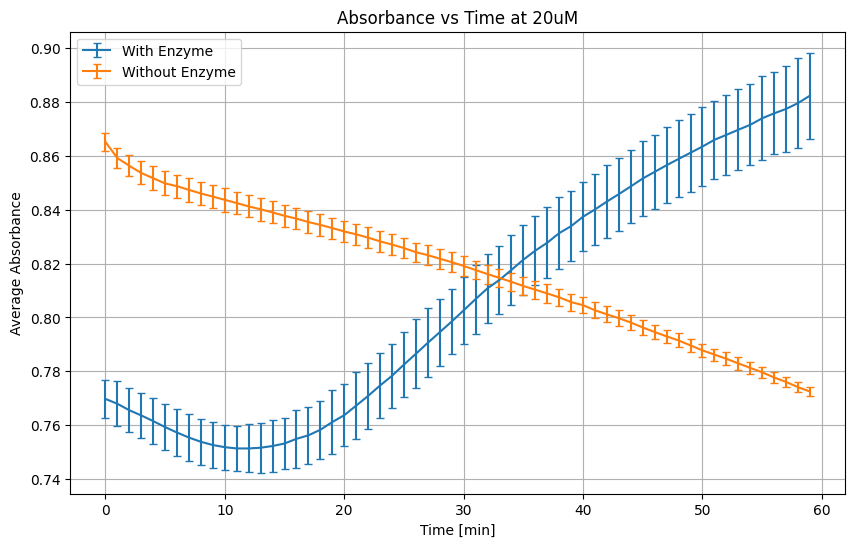

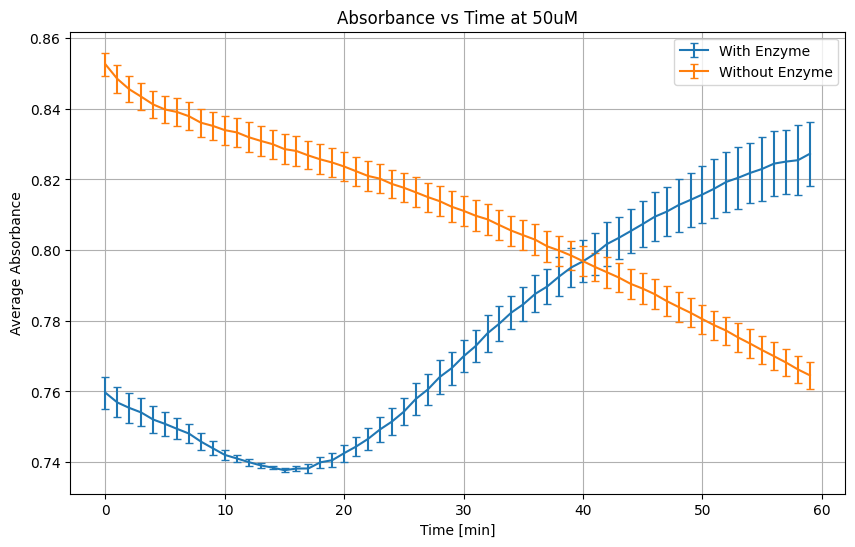

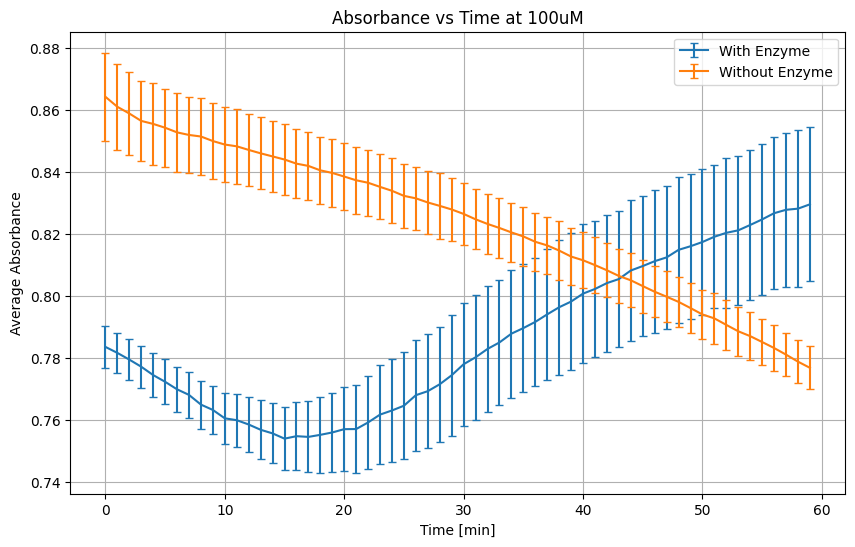

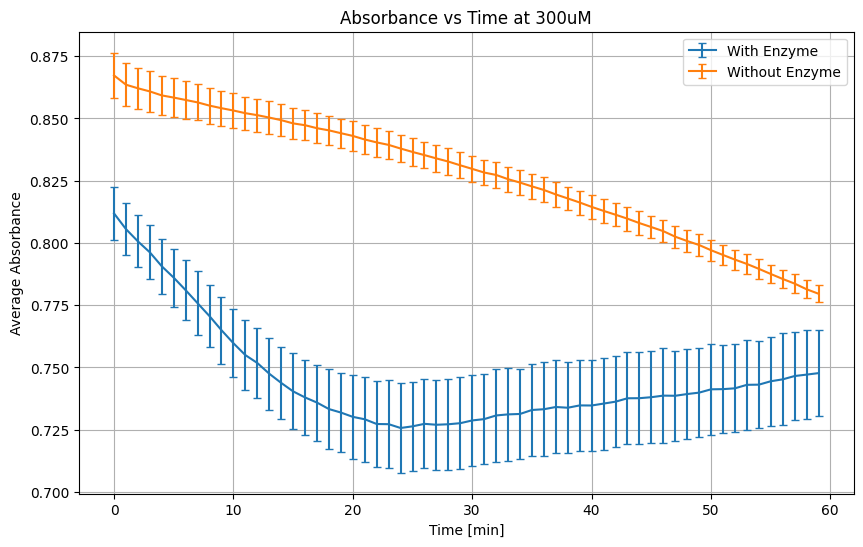

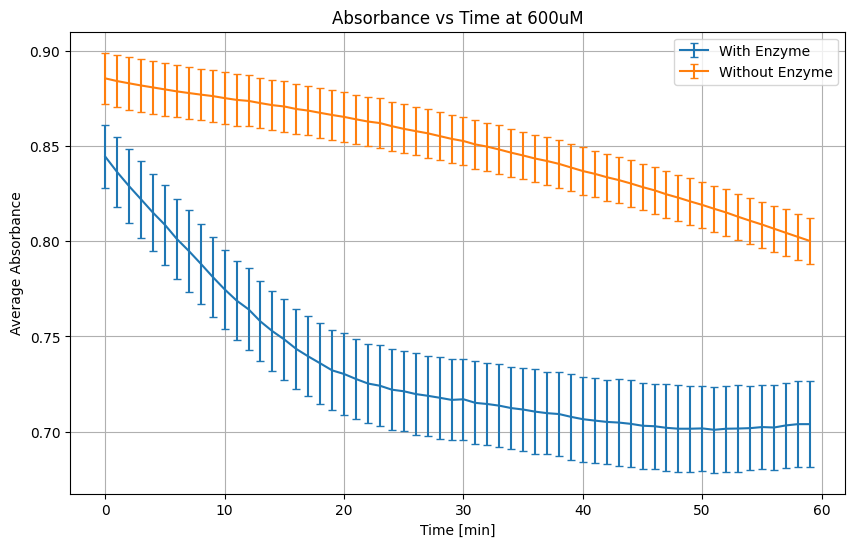

In [ ]:
import matplotlib.pyplot as plt

concentrations = ["20uM", "50uM", "100uM", "300uM", "600uM"]

for conc in concentrations:
    plt.figure(figsize=(10, 6))

    # Filter data for 'with enzyme'
    condition_with_enzyme = f"with enzyme_{conc}"
    if condition_with_enzyme in plotting_dataframes and plotting_dataframes[condition_with_enzyme] is not None:
        df_with_enzyme = plotting_dataframes[condition_with_enzyme]
        plt.errorbar(df_with_enzyme['Time [min]'], df_with_enzyme['Average Reading'], yerr=df_with_enzyme['Standard Deviation'], label='With Enzyme', capsize=3)

    # Filter data for 'without enzyme'
    condition_without_enzyme = f"without enzyme_{conc}"
    if condition_without_enzyme in plotting_dataframes and plotting_dataframes[condition_without_enzyme] is not None:
        df_without_enzyme = plotting_dataframes[condition_without_enzyme]
        plt.errorbar(df_without_enzyme['Time [min]'], df_without_enzyme['Average Reading'], yerr=df_without_enzyme['Standard Deviation'], label='Without Enzyme', capsize=3)

    plt.title(f'Absorbance vs Time at {conc}')
    plt.xlabel('Time [min]')
    plt.ylabel('Average Absorbance')
    plt.legend()
    plt.grid(True) # Add grid lines
    plt.show()

## Summary:

### Data Analysis Key Findings

*   Standard deviation was successfully calculated across triplicate absorbance readings for each time point and added to the averaged dataframes.
*   Five plots were generated, one for each concentration (20uM, 50uM, 100uM, 300uM, and 600uM), showing the average absorbance versus time.
*   Each plot included separate lines for 'with enzyme' and 'without enzyme' conditions, allowing for a direct comparison of absorbance changes over time under different enzyme conditions for a given substrate concentration.
*   Error bars representing the standard deviation were successfully added to the lines in each plot, indicating the variability of the measurements.

### Insights or Next Steps

*   Analyze the generated plots to observe the rate of absorbance change (reaction velocity) at different substrate concentrations in the presence of the enzyme compared to the background change without the enzyme.
*   Quantify the initial reaction velocities from these plots to perform kinetic analysis, such as determining the Michaelis-Menten parameters (Km and Vmax) of the enzyme.


# Task
Analyze spectrophotometric data from enzymatic assays in the files "/content/10 flashes/content/10 flashes.xlsx" and "/content/25 flashes.xlsx". For each file, extract data for concentrations 20uM, 50uM, 100uM, 300uM, and 600uM, with and without enzyme (triplicates for each). Average the triplicates, convert time from seconds to minutes, and calculate standard deviations. Plot absorbance vs time for each concentration, showing both with and without enzyme conditions on the same graph with error bars. Generate a total of 5 graphs per file.

## Data loading

### Subtask:
Load the data from "/content/25 flashes.xlsx" into a dataframe.


**Reasoning**:
The subtask is to load the data from "/content/25 flashes.xlsx" into a dataframe. I will use pandas to read the Excel file and display the head of the dataframe to verify the loading.



In [ ]:
import pandas as pd

excel_file_path = '/content/25 flashes.xlsx'
try:
    df_25_flashes = pd.read_excel(excel_file_path)
    print("Excel file loaded successfully!")
    display(df_25_flashes.head())
except FileNotFoundError:
    print(f"Error: File not found at {excel_file_path}")
except Exception as e:
    print(f"An error occurred while reading the Excel file: {e}")

Excel file loaded successfully!


,Cycle Nr.,Time [s],Temp. [°C],A1,A2,A3,A4,A5,A6,A7,...,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12
0,1,0.000,24.9,0.8594,0.8888,0.8622,0.8875,0.8805,0.9017,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,60.015,24.4,0.8574,0.8876,0.8603,0.8866,0.8791,0.8991,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,120.033,24.8,0.8560,0.8862,0.8583,0.8858,0.8777,0.8975,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,180.048,24.6,0.8543,0.8846,0.8568,0.8850,0.8764,0.8952,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,240.060,24.7,0.8524,0.8827,0.8549,0.8838,0.8750,0.8937,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data extraction

### Subtask:
Extract the relevant columns based on the enzyme concentration and condition (with/without enzyme), similar to the previous analysis.


**Reasoning**:
Define the data map for the 25 flashes data, initialize a dictionary to store extracted dataframes, extract the time column, and then iterate through the data map to extract the relevant columns and combine them with the time column, storing the results in the extracted dataframes dictionary. Finally, display the head of the first extracted dataframe to confirm the extraction.



In [ ]:
data_map_25_flashes = {
    "with enzyme_20uM": ["A1", "A2", "A3"],
    "with enzyme_50uM": ["B1", "B2", "B3"],
    "with enzyme_100uM": ["C1", "C2", "C3"],
    "with enzyme_300uM": ["D1", "D2", "D3"],
    "with enzyme_600uM": ["E1", "E2", "E3"],
    "without enzyme_20uM": ["A4", "A5", "A6"],
    "without enzyme_50uM": ["B4", "B5", "B6"],
    "without enzyme_100uM": ["C4", "C5", "C6"],
    "without enzyme_300uM": ["D4", "D5", "D6"],
    "without enzyme_600uM": ["E4", "E5", "E6"]
}

extracted_dataframes_25_flashes = {}

time_column_25_flashes = df_25_flashes['Time [s]']

for condition, columns in data_map_25_flashes.items():
    try:
        extracted_df_25_flashes = df_25_flashes[columns].copy()
        extracted_df_25_flashes.insert(0, 'Time [s]', time_column_25_flashes)
        extracted_dataframes_25_flashes[condition] = extracted_df_25_flashes
    except KeyError as e:
        print(f"Warning: Column {e} not found in the DataFrame for {condition}.")
        extracted_dataframes_25_flashes[condition] = None

print("Data extraction for 25 flashes completed.")

# Display the extracted dataframes for each condition
for condition, data in extracted_dataframes_25_flashes.items():
    print(f"Data for condition: {condition}")
    if data is not None:
        display(data.head())
    else:
        print("No data extracted due to missing columns.")


Data extraction for 25 flashes completed.
Data for condition: with enzyme_20uM


,Time [s],A1,A2,A3
0,0.000,0.8594,0.8888,0.8622
1,60.015,0.8574,0.8876,0.8603
2,120.033,0.8560,0.8862,0.8583
3,180.048,0.8543,0.8846,0.8568
4,240.060,0.8524,0.8827,0.8549


Data for condition: with enzyme_50uM


,Time [s],B1,B2,B3
0,0.000,0.8814,0.8777,0.8848
1,60.015,0.8788,0.8764,0.8837
2,120.033,0.8767,0.8750,0.8810
3,180.048,0.8754,0.8736,0.8791
4,240.060,0.8738,0.8719,0.8768


Data for condition: with enzyme_100uM


,Time [s],C1,C2,C3
0,0.000,0.8902,0.9006,0.9137
1,60.015,0.8877,0.8967,0.9096
2,120.033,0.8845,0.8935,0.9061
3,180.048,0.8818,0.8903,0.9043
4,240.060,0.8786,0.8869,0.9007


Data for condition: with enzyme_300uM


,Time [s],D1,D2,D3
0,0.000,0.9033,0.9326,0.9344
1,60.015,0.8985,0.9271,0.9289
2,120.033,0.8925,0.9210,0.9237
3,180.048,0.8875,0.9166,0.9191
4,240.060,0.8820,0.9106,0.9141


Data for condition: with enzyme_600uM


,Time [s],E1,E2,E3
0,0.000,0.9222,0.9251,0.9197
1,60.015,0.9150,0.9182,0.9132
2,120.033,0.9081,0.9111,0.9061
3,180.048,0.9010,0.9039,0.8984
4,240.060,0.8934,0.8965,0.8907


Data for condition: without enzyme_20uM


,Time [s],A4,A5,A6
0,0.000,0.8875,0.8805,0.9017
1,60.015,0.8866,0.8791,0.8991
2,120.033,0.8858,0.8777,0.8975
3,180.048,0.8850,0.8764,0.8952
4,240.060,0.8838,0.8750,0.8937


Data for condition: without enzyme_50uM


,Time [s],B4,B5,B6
0,0.000,0.9140,0.9602,0.9190
1,60.015,0.9125,0.9557,0.9189
2,120.033,0.9115,0.9531,0.9181
3,180.048,0.9107,0.9519,0.9175
4,240.060,0.9098,0.9495,0.9165


Data for condition: without enzyme_100uM


,Time [s],C4,C5,C6
0,0.000,0.9026,0.9067,0.9065
1,60.015,0.9007,0.9067,0.9060
2,120.033,0.9003,0.9056,0.9052
3,180.048,0.8998,0.9051,0.9047
4,240.060,0.8993,0.9043,0.9040


Data for condition: without enzyme_300uM


,Time [s],D4,D5,D6
0,0.000,0.9260,0.9325,0.9351
1,60.015,0.9251,0.9301,0.9353
2,120.033,0.9236,0.9281,0.9337
3,180.048,0.9236,0.9266,0.9335
4,240.060,0.9225,0.9248,0.9322


Data for condition: without enzyme_600uM


,Time [s],E4,E5,E6
0,0.000,0.9850,0.9596,0.9460
1,60.015,0.9820,0.9551,0.9450
2,120.033,0.9806,0.9540,0.9439
3,180.048,0.9784,0.9520,0.9429
4,240.060,0.9759,0.9499,0.9417


**Reasoning**:
The relevant columns have been extracted. The next step is to average the triplicate readings and convert time to minutes for the 25 flashes data, similar to the previous analysis.



In [ ]:
averaged_dataframes_25_flashes = {}

for condition, df in extracted_dataframes_25_flashes.items():
    if df is not None:
        # Convert 'Time [s]' to 'Time [min]'
        df['Time [min]'] = df['Time [s]'] / 60

        # Select only the triplicate columns (excluding 'Time [s]' and 'Time [min]')
        triplicate_columns = data_map_25_flashes[condition]

        # Calculate the average of the triplicate columns
        df['Average Reading'] = df[triplicate_columns].mean(axis=1)

        # Select only 'Time [min]' and 'Average Reading' for the new dataframe
        averaged_df_25_flashes = df[['Time [min]', 'Average Reading']].copy()

        averaged_dataframes_25_flashes[condition] = averaged_df_25_flashes
        print(f"Averaged data for condition: {condition}")
        display(averaged_df_25_flashes.head())
    else:
        print(f"No data to average for condition: {condition}")

Averaged data for condition: with enzyme_20uM


,Time [min],Average Reading
0,0.00000,0.870133
1,1.00025,0.868433
2,2.00055,0.866833
3,3.00080,0.865233
4,4.00100,0.863333


Averaged data for condition: with enzyme_50uM


,Time [min],Average Reading
0,0.00000,0.881300
1,1.00025,0.879633
2,2.00055,0.877567
3,3.00080,0.876033
4,4.00100,0.874167


Averaged data for condition: with enzyme_100uM


,Time [min],Average Reading
0,0.00000,0.901500
1,1.00025,0.898000
2,2.00055,0.894700
3,3.00080,0.892133
4,4.00100,0.888733


Averaged data for condition: with enzyme_300uM


,Time [min],Average Reading
0,0.00000,0.923433
1,1.00025,0.918167
2,2.00055,0.912400
3,3.00080,0.907733
4,4.00100,0.902233


Averaged data for condition: with enzyme_600uM


,Time [min],Average Reading
0,0.00000,0.922333
1,1.00025,0.915467
2,2.00055,0.908433
3,3.00080,0.901100
4,4.00100,0.893533


Averaged data for condition: without enzyme_20uM


,Time [min],Average Reading
0,0.00000,0.889900
1,1.00025,0.888267
2,2.00055,0.887000
3,3.00080,0.885533
4,4.00100,0.884167


Averaged data for condition: without enzyme_50uM


,Time [min],Average Reading
0,0.00000,0.931067
1,1.00025,0.929033
2,2.00055,0.927567
3,3.00080,0.926700
4,4.00100,0.925267


Averaged data for condition: without enzyme_100uM


,Time [min],Average Reading
0,0.00000,0.905267
1,1.00025,0.904467
2,2.00055,0.903700
3,3.00080,0.903200
4,4.00100,0.902533


Averaged data for condition: without enzyme_300uM


,Time [min],Average Reading
0,0.00000,0.931200
1,1.00025,0.930167
2,2.00055,0.928467
3,3.00080,0.927900
4,4.00100,0.926500


Averaged data for condition: without enzyme_600uM


,Time [min],Average Reading
0,0.00000,0.963533
1,1.00025,0.960700
2,2.00055,0.959500
3,3.00080,0.957767
4,4.00100,0.955833


**Reasoning**:
The averaged dataframes for the 25 flashes data have been created. The next step is to calculate the standard deviation for the triplicates and add it to these averaged dataframes.



In [ ]:
plotting_dataframes_25_flashes = {}

for condition, columns in data_map_25_flashes.items():
    extracted_df_25_flashes = extracted_dataframes_25_flashes[condition]
    averaged_df_25_flashes = averaged_dataframes_25_flashes[condition].copy()

    if extracted_df_25_flashes is not None:
        # Calculate the standard deviation across the triplicate columns
        std_dev_25_flashes = extracted_df_25_flashes[columns].std(axis=1)

        # Add the standard deviation as a new column to the averaged dataframe
        averaged_df_25_flashes['Standard Deviation'] = std_dev_25_flashes

        plotting_dataframes_25_flashes[condition] = averaged_df_25_flashes
        print(f"Combined data for condition: {condition}")
        display(averaged_df_25_flashes.head())
    else:
        print(f"No data to combine for condition: {condition}")

# Display the head of the first combined dataframe
if plotting_dataframes_25_flashes:
    first_condition_25_flashes = list(plotting_dataframes_25_flashes.keys())[0]
    print(f"\nHead of the first combined dataframe ({first_condition_25_flashes}):")
    display(plotting_dataframes_25_flashes[first_condition_25_flashes].head())
else:
    print("\nNo dataframes were combined.")

Combined data for condition: with enzyme_20uM


,Time [min],Average Reading,Standard Deviation
0,0.00000,0.870133,0.016226
1,1.00025,0.868433,0.016662
2,2.00055,0.866833,0.016811
3,3.00080,0.865233,0.016819
4,4.00100,0.863333,0.016819


Combined data for condition: with enzyme_50uM


,Time [min],Average Reading,Standard Deviation
0,0.00000,0.881300,0.003551
1,1.00025,0.879633,0.003721
2,2.00055,0.877567,0.003092
3,3.00080,0.876033,0.002804
4,4.00100,0.874167,0.002470


Combined data for condition: with enzyme_100uM


,Time [min],Average Reading,Standard Deviation
0,0.00000,0.901500,0.011776
1,1.00025,0.898000,0.011008
2,2.00055,0.894700,0.010850
3,3.00080,0.892133,0.011361
4,4.00100,0.888733,0.011163


Combined data for condition: with enzyme_300uM


,Time [min],Average Reading,Standard Deviation
0,0.00000,0.923433,0.017459
1,1.00025,0.918167,0.017056
2,2.00055,0.912400,0.017287
3,3.00080,0.907733,0.017567
4,4.00100,0.902233,0.017610


Combined data for condition: with enzyme_600uM


,Time [min],Average Reading,Standard Deviation
0,0.00000,0.922333,0.002702
1,1.00025,0.915467,0.002532
2,2.00055,0.908433,0.002517
3,3.00080,0.901100,0.002751
4,4.00100,0.893533,0.002902


Combined data for condition: without enzyme_20uM


,Time [min],Average Reading,Standard Deviation
0,0.00000,0.889900,0.010802
1,1.00025,0.888267,0.010104
2,2.00055,0.887000,0.009954
3,3.00080,0.885533,0.009411
4,4.00100,0.884167,0.009355


Combined data for condition: without enzyme_50uM


,Time [min],Average Reading,Standard Deviation
0,0.00000,0.931067,0.025354
1,1.00025,0.929033,0.023315
2,2.00055,0.927567,0.022357
3,3.00080,0.926700,0.022087
4,4.00100,0.925267,0.021252


Combined data for condition: without enzyme_100uM


,Time [min],Average Reading,Standard Deviation
0,0.00000,0.905267,0.002312
1,1.00025,0.904467,0.003281
2,2.00055,0.903700,0.002951
3,3.00080,0.903200,0.002951
4,4.00100,0.902533,0.002804


Combined data for condition: without enzyme_300uM


,Time [min],Average Reading,Standard Deviation
0,0.00000,0.931200,0.004687
1,1.00025,0.930167,0.005100
2,2.00055,0.928467,0.005060
3,3.00080,0.927900,0.005076
4,4.00100,0.926500,0.005069


Combined data for condition: without enzyme_600uM


,Time [min],Average Reading,Standard Deviation
0,0.00000,0.963533,0.019795
1,1.00025,0.960700,0.019125
2,2.00055,0.959500,0.018958
3,3.00080,0.957767,0.018439
4,4.00100,0.955833,0.017855



Head of the first combined dataframe (with enzyme_20uM):


,Time [min],Average Reading,Standard Deviation
0,0.00000,0.870133,0.016226
1,1.00025,0.868433,0.016662
2,2.00055,0.866833,0.016811
3,3.00080,0.865233,0.016819
4,4.00100,0.863333,0.016819


## Data processing

### Subtask:
Average the triplicates and convert the time from seconds to minutes for each condition. Calculate the standard deviation for error bars.


## Data visualization

### Subtask:
Generate 5 plots, one for each concentration, showing the average absorbance vs time for both 'with enzyme' and 'without enzyme' conditions with error bars.


**Reasoning**:
Generate the plots for each concentration from the '25 flashes' data, showing average absorbance vs time with error bars for both enzyme conditions.



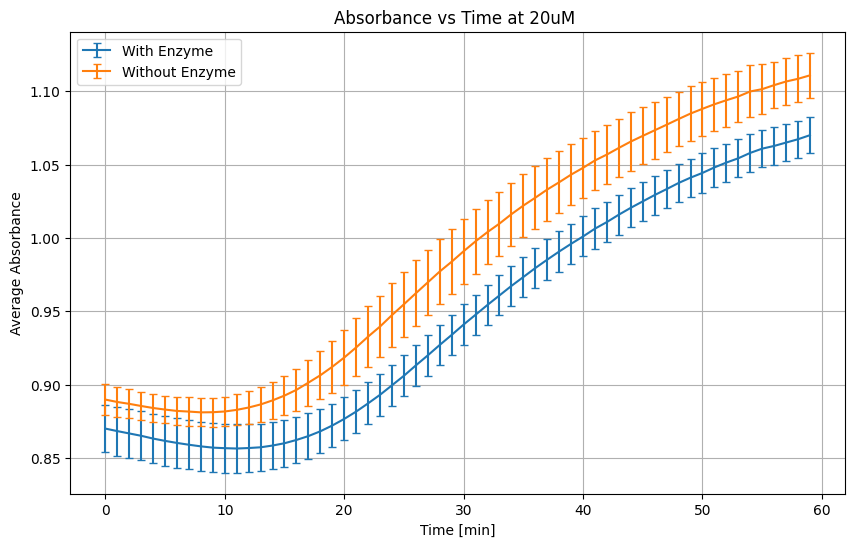

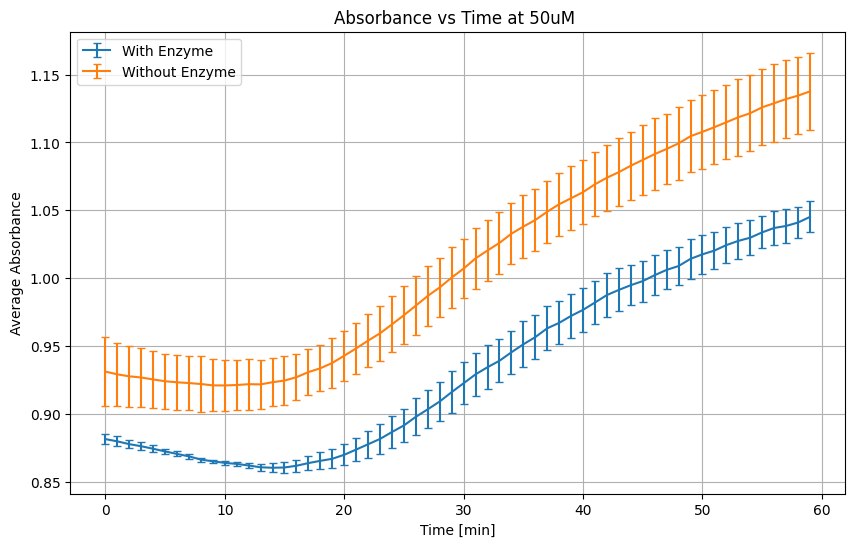

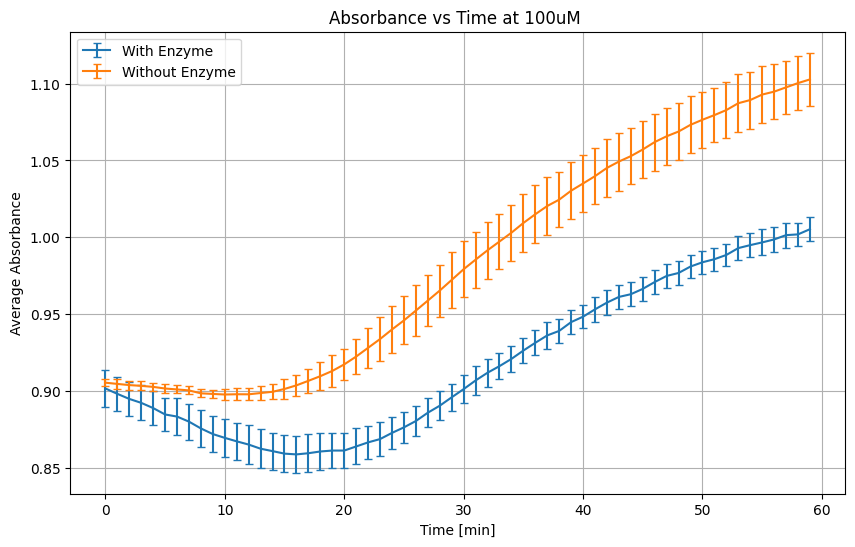

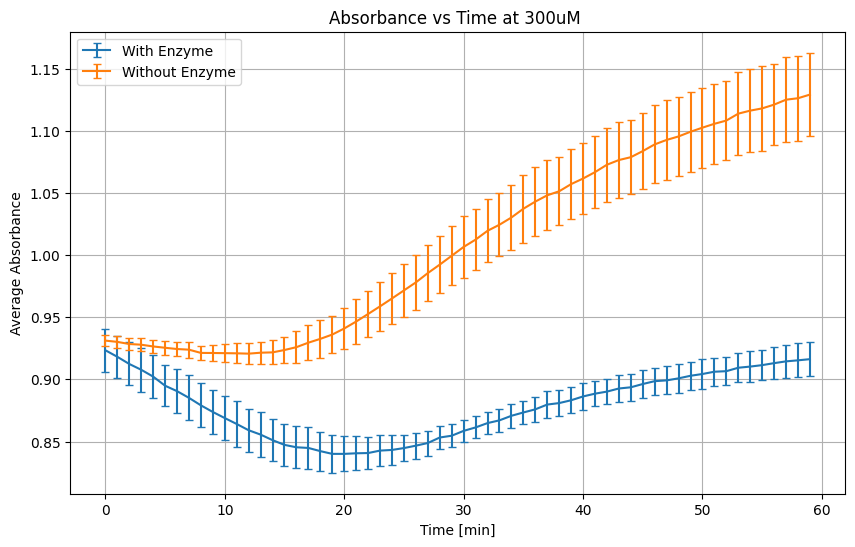

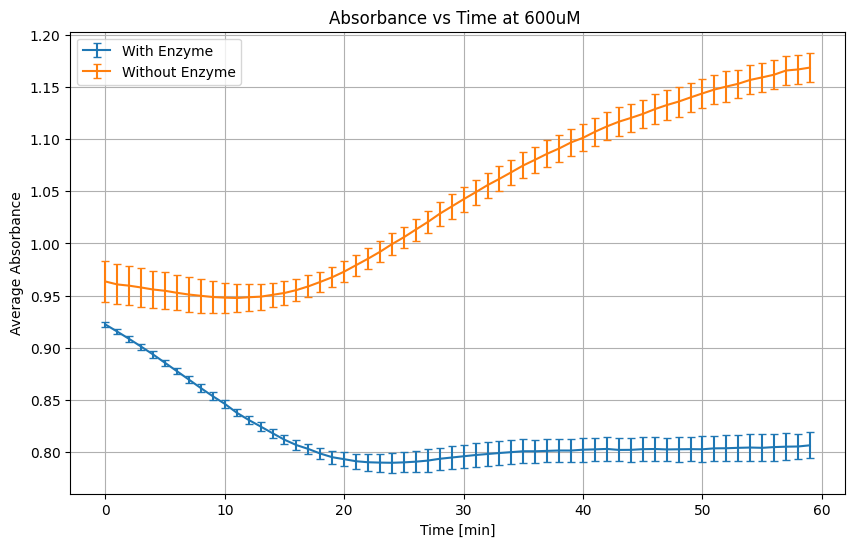

In [ ]:
import matplotlib.pyplot as plt

concentrations = ["20uM", "50uM", "100uM", "300uM", "600uM"]

for conc in concentrations:
    plt.figure(figsize=(10, 6))

    # Filter data for 'with enzyme' from plotting_dataframes_25_flashes
    condition_with_enzyme = f"with enzyme_{conc}"
    if condition_with_enzyme in plotting_dataframes_25_flashes and plotting_dataframes_25_flashes[condition_with_enzyme] is not None:
        df_with_enzyme = plotting_dataframes_25_flashes[condition_with_enzyme]
        plt.errorbar(df_with_enzyme['Time [min]'], df_with_enzyme['Average Reading'], yerr=df_with_enzyme['Standard Deviation'], label='With Enzyme', capsize=3)

    # Filter data for 'without enzyme' from plotting_dataframes_25_flashes
    condition_without_enzyme = f"without enzyme_{conc}"
    if condition_without_enzyme in plotting_dataframes_25_flashes and plotting_dataframes_25_flashes[condition_without_enzyme] is not None:
        df_without_enzyme = plotting_dataframes_25_flashes[condition_without_enzyme]
        plt.errorbar(df_without_enzyme['Time [min]'], df_without_enzyme['Average Reading'], yerr=df_without_enzyme['Standard Deviation'], label='Without Enzyme', capsize=3)

    plt.title(f'Absorbance vs Time at {conc} ')
    plt.xlabel('Time [min]')
    plt.ylabel('Average Absorbance')
    plt.legend()
    plt.grid(True) # Add grid lines
    plt.show()

## Summary:

### Data Analysis Key Findings

*   Data for 25 flashes was successfully loaded from the Excel file and organized by concentration and enzyme presence/absence.
*   Triplicate absorbance readings were averaged for each time point and condition.
*   Time was converted from seconds to minutes for plotting purposes.
*   Standard deviations of the triplicate readings were calculated to represent the variability in the data.
*   Five plots were generated, one for each concentration (20uM, 50uM, 100uM, 300uM, and 600uM), showing the average absorbance over time with error bars for both 'with enzyme' and 'without enzyme' conditions.

### Insights or Next Steps

*   Compare the plots for 'with enzyme' and 'without enzyme' conditions at each concentration to observe the effect of the enzyme on the absorbance change over time.
*   Repeat the entire analysis process for the "10 flashes" dataset as outlined in the initial task description.
